In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

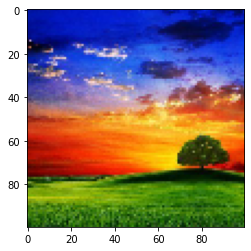

In [2]:
inputImg = plt.imread('CroppedResizedImage.png')[:,:,:3]
plt.imshow(inputImg)
plt.show()

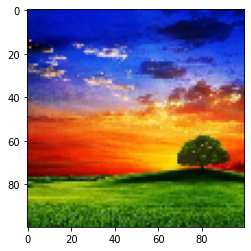

In [3]:
RGBIMag = inputImg.copy()
RGBIMag = RGBIMag*255.0
RGBIMag = RGBIMag.astype(np.uint8)

plt.imshow(RGBIMag)
plt.show()

In [4]:
# Conversion using cv2

(100, 100, 3)
(100, 100) (100, 100) (100, 100)


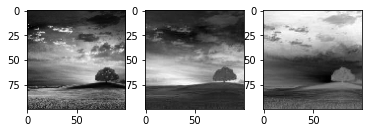

In [5]:
YCrCbusingCV2 = cv2.cvtColor(RGBIMag, cv2.COLOR_RGB2YCrCb)
print(YCrCbusingCV2.shape)
YusingCV2 = YCrCbusingCV2[:,:,0]
CrusingCV2 = YCrCbusingCV2[:,:,1]
CbusingCV2 = YCrCbusingCV2[:,:,2]
print(YusingCV2.shape, CrusingCV2.shape, CbusingCV2.shape)

fig, axs = plt.subplots(1,3)

axs[0].imshow(YusingCV2, cmap='gray')
axs[1].imshow(CrusingCV2, cmap='gray')
axs[2].imshow(CbusingCV2, cmap='gray')

plt.show()

In [6]:
print(YusingCV2[:5,:5], CrusingCV2[:5,:5], CbusingCV2[:5,:5], sep='\n')

[[32 33 28 29 29]
 [30 30 30 32 31]
 [32 33 33 33 33]
 [32 33 31 32 33]
 [33 31 35 31 30]]
[[109 108 109 109 109]
 [107 107 107 106 106]
 [105 104 104 104 104]
 [106 106 106 106 106]
 [104 106 106 108 107]]
[[199 199 199 199 202]
 [200 201 203 205 204]
 [202 204 206 209 205]
 [206 205 205 205 207]
 [204 204 204 203 206]]


255 0 4902


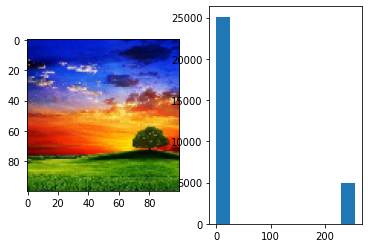

In [7]:
RGBoutFromCV2 = cv2.cvtColor(YCrCbusingCV2, cv2.COLOR_YCrCb2RGB)


err = (RGBoutFromCV2 - RGBIMag)
print(np.max(err), np.min(err), np.sum(err>100))

fig, axs = plt.subplots(1, 2)

axs[0].imshow(RGBoutFromCV2/255.0)
axs[1].hist(err.flatten())
plt.show()

# conversion using Formula's

In [8]:
def RGBtoYCrCb(Rin, Gin, Bin):
    Yout = 0.299*Rin + 0.587*Gin + 0.114*Bin
    Cr = 0.499*Rin - 0.418*Gin - 0.0813*Bin + 128
    Cb = -0.169*Rin - 0.331*Gin + 0.499*Bin + 128
    return {'Y' : Yout, 'Cr' : Cr, 'Cb' : Cb}

In [9]:
def YCrCbtoRGB(Yin, Cr, Cb):
    Rout = Yin + (1.402*(Cr-128))
    Gout = Yin - (0.344*(Cb-128)) - (0.714*(Cr-128))
    Bout = Yin + (1.772*(Cb-128))
    if Rout > 255:
        Rout = 255
    elif Rout < 0:
        Rout = 0
    else:
        Rout = Rout
    
    if Gout > 255:
        Gout = 255
    elif Gout < 0:
        Gout = 0
    else:
        Gout = Gout
    
    if Bout > 255:
        Bout = 255
    elif Bout < 0:
        Bout = 0
    else:
        Bout = Bout
    return {'R' : Rout, 'G' : Gout, 'B' : Bout}

In [10]:
YCrCbfromFormula = np.zeros((YCrCbusingCV2.shape))
YfromFormula = np.zeros((YusingCV2.shape))
CrfromFormula = np.zeros((CrusingCV2.shape))
CbfromFormula = np.zeros((CbusingCV2.shape))

for i in range(RGBIMag.shape[0]):
    for j in range(RGBIMag.shape[1]):
        YCrCbfrom444 = RGBtoYCrCb(RGBIMag[i,j,0], RGBIMag[i,j,1], RGBIMag[i,j,2])
        YfromFormula[i,j] = YCrCbfrom444['Y']
        CrfromFormula[i,j] = YCrCbfrom444['Cr']
        CbfromFormula[i,j] = YCrCbfrom444['Cb']
        YCrCbfromFormula[i,j, :] = np.asarray([YCrCbfrom444['Y'], YCrCbfrom444['Cr'], YCrCbfrom444['Cb']])


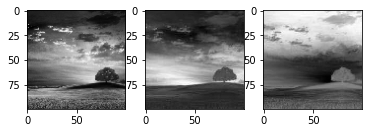

In [11]:
fig, axs = plt.subplots(1,3)

axs[0].imshow(YfromFormula, cmap='gray')
axs[1].imshow(CrfromFormula, cmap='gray')
axs[2].imshow(CbfromFormula, cmap='gray')

plt.show()

In [12]:
abs(YusingCV2 - YfromFormula).max(), abs(CrusingCV2 - CrfromFormula).max(), abs(CbusingCV2 - CbfromFormula).max(), abs(YCrCbusingCV2 - YCrCbfromFormula).max()

(0.5019999999999953,
 0.9298000000000002,
 0.9749999999999943,
 0.9749999999999943)

In [13]:
RGBfromFormula = np.zeros((RGBoutFromCV2.shape))
RfromFormula = np.zeros((RGBoutFromCV2.shape[0], RGBoutFromCV2.shape[1]))
GfromFormula = np.zeros((RGBoutFromCV2.shape[0], RGBoutFromCV2.shape[1]))
BfromFormula = np.zeros((RGBoutFromCV2.shape[0], RGBoutFromCV2.shape[1]))

for i in range(RGBIMag.shape[0]):
    for j in range(RGBIMag.shape[1]):
        RGBfrom = YCrCbtoRGB(YCrCbfromFormula[i,j, 0], YCrCbfromFormula[i,j, 1], YCrCbfromFormula[i,j, 2])
        RfromFormula[i,j] = RGBfrom['R']
        GfromFormula[i,j] = RGBfrom['G']
        BfromFormula[i,j] = RGBfrom['B']

In [14]:
RGBfromFormula[:,:, 0] = RfromFormula
RGBfromFormula[:,:, 1] = GfromFormula
RGBfromFormula[:,:, 2] = BfromFormula

RGBfromFormula =RGBfromFormula

In [15]:
RfromFormula.max(), RfromFormula.min(), GfromFormula.max(), GfromFormula.min(), BfromFormula.max(), BfromFormula.min()

(254.865073,
 0.0015208000000050959,
 244.1160702,
 0.07009219999999416,
 254.56171200000003,
 0.0)

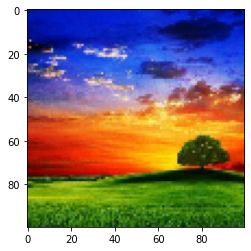

In [16]:
plt.imshow(RGBfromFormula/255.0)
plt.show()

0.46182000000004564 0.0 0


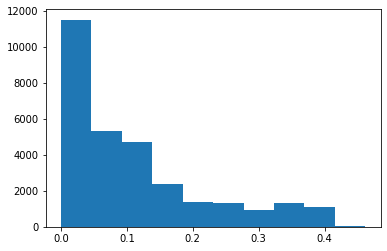

In [17]:
er = abs(RGBfromFormula - RGBIMag)
print(er.max(), er.min(), np.sum(er>100))
plt.hist(er.flatten())
plt.show()